# Resampling Datetime Data

Part 1) Load the data and make a datetime index.
1. Convert the date column to datetime dtype.
2.  Set the date column as the index.
3. Filter out only the required data:
    - Keep only data from the year 2000 or later.
    - Keep only the following features:
        - precipitation
        - mean_temp
        - min_temp
        - max_temp
        - snow_depth
4. Impute any missing values.
    - Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

## Imports/Settings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt

## DataFrame

In [2]:
file = "Data/london_weather_MODIFIED.csv"
df = pd.read_csv(file)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


# Part 1

## 1. Convert the date column to datetime dtype.

In [3]:
df.loc[0,'date']

19790101

In [4]:
fmt = '%Y%m%d'

In [5]:
df['date'] = pd.to_datetime(df['date'], format=fmt)
df.info
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 2.Set the date column as the index.

In [6]:
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 3.Filter Data

In [7]:
# Only dates 2000 or later
df = df.loc[df.index.year >= 2000]
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.0,0.4,18.0,10.8,7.0,4.9,0.0,102450.0,0.0
2000-01-02,7.0,0.7,20.0,11.5,7.9,5.0,0.2,102530.0,0.0
2000-01-03,8.0,0.0,13.0,9.5,9.4,7.2,6.0,101860.0,0.0
2000-01-04,5.0,2.9,34.0,11.0,7.0,4.4,0.2,101480.0,0.0
2000-01-05,5.0,1.3,25.0,10.8,6.4,1.9,0.8,101420.0,0.0


In [8]:
# Key Features
key_feat = ['precipitation','mean_temp','min_temp','max_temp', 'snow_depth']
df = df[key_feat]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


## 4.Impute any missing values.

### Confirm Frequency

In [9]:
df = df.asfreq('D')
df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


### precipitation

In [10]:
df['precipitation'].isna().sum()

390

In [11]:
df['precipitation'] = df['precipitation'].interpolate()

In [12]:
#### Confirmation
df['precipitation'].isna().sum()

0

### mean_temp

In [13]:
df['mean_temp'].isna().sum()

419

In [14]:
df['mean_temp'] = df['mean_temp'].interpolate()

In [15]:
#### confirmation
df['mean_temp'].isna().sum()

0

### min_temp

In [16]:
df['min_temp'].isna().sum()

386

In [17]:
df['min_temp'] = df['min_temp'].interpolate()

In [18]:
#### confirmation
df['min_temp'].isna().sum()

0

### max_temp

In [19]:
df['max_temp'].isna().sum()

390

In [20]:
df['max_temp'] = df['max_temp'].interpolate()

In [21]:
#### confirmation
df['max_temp'].isna().sum()

0

### snow_depth

In [22]:
df['snow_depth'].isna().sum()

1752

In [23]:
df['snow_depth'] = df['snow_depth'].fillna(method='ffill')

In [24]:
#### confirmation
df['snow_depth'].isna().sum()

0

# Part 2

Answer the Questions with Visualizations (Using the Correct Frequency)
- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
- If there is a specific time period, plot only that time period.

## Default Parameters

In [25]:
plt.rcParams['figure.figsize'] = (12,3)

## Q1: 
What month had the most precipitation between 2000 through 2010?

- Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
- Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
- Make sure to add a legend so that your label is visible.

Q1 Visualization Requirements
- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
    - Create a wide figure (e.g. figsize=(12,3))
        - With the title "Precipitation for 2000-2010"
        - With a ylabel of "Inches"
    - Customize the major xaxis ticks to:
        - Have major xaxis ticks every 1 year.
        - Use 4-digit years for the labels
        - Rotate the major ticks' labels 90 degrees.
    - Customize the minor xaxis ticks to:
        - Have minor xaxis ticks every 3 months
        - Do not label the minor ticks.

In [37]:
date_range = df.loc['2000':'2010']
date_range

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2010-12-27,5.0,0.2,-4.6,8.0,1.0
2010-12-28,0.4,5.3,2.5,9.5,0.0
2010-12-29,1.4,6.8,4.1,7.7,0.0


In [38]:
q1 = date_range['precipitation']
q1.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date', length=4018, freq='D')

In [39]:
q1 = q1.resample("MS").sum()
q1.head()

date
2000-01-01    14.5
2000-02-01    64.8
2000-03-01    13.9
2000-04-01    82.5
2000-05-01    78.0
Freq: MS, Name: precipitation, dtype: float64

In [41]:
max_p = q1.idxmax()
max_p

Timestamp('2000-10-01 00:00:00', freq='MS')

<Axes: xlabel='date'>

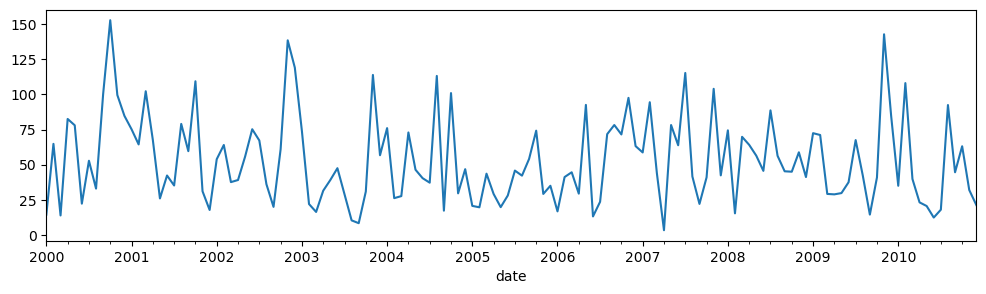

In [42]:
q1.plot()

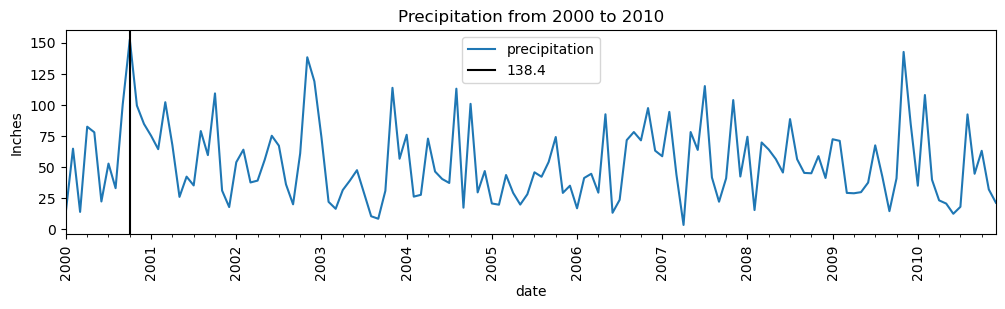

In [44]:
fig, ax = plt.subplots(figsize=(12,3))
q1.plot(ax=ax, title = 'Precipitation from 2000 to 2010')
ax.set_ylabel('Inches')
ax.axvline(max_p,color='k',label=138.4)
fig.autofmt_xdate(rotation=90,ha='center')
plt.legend();

### Answer:

The plot above shows us our target date of 2000-10-01 as the line drawn for 138.4 inches.

## Q2: 

Which year between 2000-2020 had the coolest average temperature?

In [48]:
temp = df.loc['2000':'2020'].copy()
temp

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [49]:
temp = temp['mean_temp']
temp

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
             ... 
2020-12-27    7.5
2020-12-28    1.1
2020-12-29    2.6
2020-12-30    2.7
2020-12-31   -0.8
Freq: D, Name: mean_temp, Length: 7671, dtype: float64

In [50]:
q2 = temp.resample('A').mean().copy()
q2

date
2000-12-31    11.575683
2001-12-31    11.331507
2002-12-31    12.084247
2003-12-31    12.114521
2004-12-31    11.900683
2005-12-31    11.822877
2006-12-31    12.290822
2007-12-31    11.944384
2008-12-31    11.326776
2009-12-31    11.721644
2010-12-31    10.657397
2011-12-31    12.366438
2012-12-31    11.300956
2013-12-31    11.166301
2014-12-31    12.658904
2015-12-31    12.123699
2016-12-31    11.906284
2017-12-31    12.242466
2018-12-31    12.501370
2019-12-31    12.206164
2020-12-31    12.723634
Freq: A-DEC, Name: mean_temp, dtype: float64

In [51]:
min_temp = q2.idxmin()
min_temp

Timestamp('2010-12-31 00:00:00', freq='A-DEC')

In [52]:
q2.loc[min_temp]

10.657397260273973

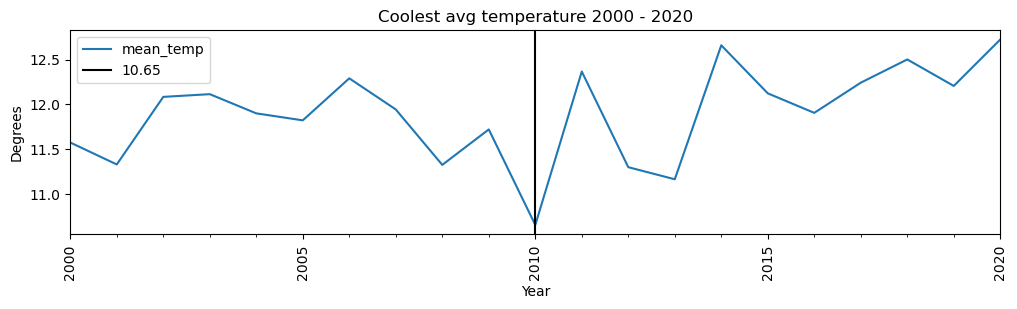

In [53]:
fig, ax = plt.subplots(figsize=(12,3))
q2.plot(ax=ax, title='Average Temperature 2000-2020')
ax.set_ylabel('Degrees')
ax.set_xlabel('Year')
ax.axvline(min_temp, color='k', label='10.65')
fig.autofmt_xdate(rotation=90,ha='center')
plt.legend();